In [ ]:
!ls /content

drive  sample_data


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Dataset 1

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Fake bot_instagram_account_detection_(Tabular)/Instagram_fake_profile_dataset.csv')
df1

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.270000,0,0.000000,0,53,0,0,32,1000,955,0
1,1,0.000000,2,0.000000,0,44,0,0,286,2740,533,0
2,1,0.100000,2,0.000000,0,0,0,1,13,159,98,0
3,1,0.000000,1,0.000000,0,82,0,0,679,414,651,0
4,1,0.000000,2,0.000000,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0.258135,0,0.000000,0,0,0,1,7,1,217,1
4996,0,0.511986,1,0.000000,0,0,0,0,0,51,24,1
4997,0,0.473108,1,0.353231,0,0,0,0,0,20,0,1
4998,0,0.293326,1,0.000000,0,0,0,0,75,1314,5120,1


##Preprocessing & Cleaning

In [ ]:
df1.describe(include='all')

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.00000
mean,0.598200,0.166175,1.212800,0.036068,0.007600,20.997200,0.049600,0.227800,103.331400,5.124435e+04,481.381800,0.50000
std,0.490311,0.194733,0.890435,0.106235,0.086855,33.234706,0.217139,0.419455,377.804886,5.963749e+05,761.530132,0.50005
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+01,58.000000,0.00000
50%,1.000000,0.089193,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,10.000000,1.450000e+02,242.000000,0.50000
75%,1.000000,0.300410,2.000000,0.000000,0.000000,31.250000,0.000000,0.000000,81.000000,6.960000e+02,591.000000,1.00000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.00000


In [ ]:
df1.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [ ]:
df1.duplicated().sum()

np.int64(66)

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.reset_index(drop=True, inplace=True)
df1

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.270000,0,0.000000,0,53,0,0,32,1000,955,0
1,1,0.000000,2,0.000000,0,44,0,0,286,2740,533,0
2,1,0.100000,2,0.000000,0,0,0,1,13,159,98,0
3,1,0.000000,1,0.000000,0,82,0,0,679,414,651,0
4,1,0.000000,2,0.000000,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4929,0,0.258135,0,0.000000,0,0,0,1,7,1,217,1
4930,0,0.511986,1,0.000000,0,0,0,0,0,51,24,1
4931,0,0.473108,1,0.353231,0,0,0,0,0,20,0,1
4932,0,0.293326,1,0.000000,0,0,0,0,75,1314,5120,1


In [ ]:
df1.duplicated().sum()

np.int64(0)

In [ ]:
df1['fake'].value_counts()

,count
fake,
0,2476
1,2458


In [ ]:
df1['private'].value_counts()

,count
private,
0,3811
1,1123


In [ ]:
df1['profile pic'].value_counts()

,count
profile pic,
1,2963
0,1971


In [ ]:
df1['name==username'].value_counts()

,count
name==username,
0,4896
1,38


In [ ]:
df1['external URL'].value_counts()

,count
external URL,
0,4686
1,248


##Data Visualization

### Data distribution

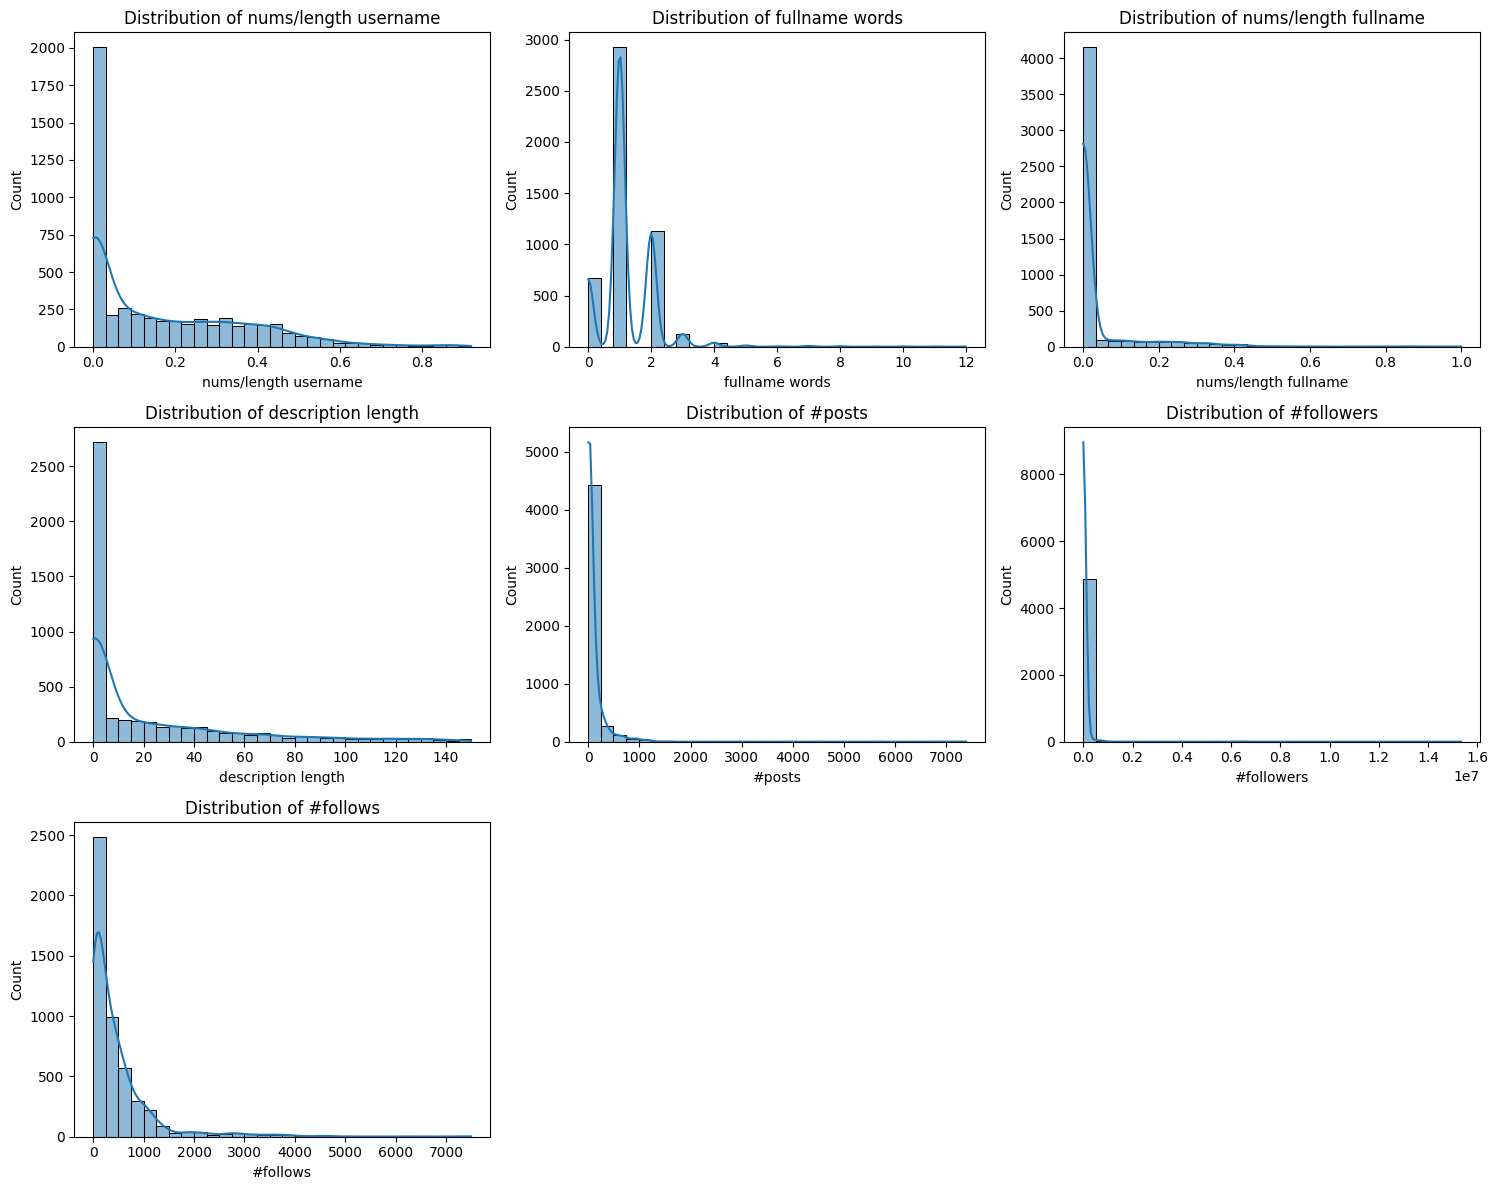

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
# List of all features
cols = [
    'nums/length username',
    'fullname words',
    'nums/length fullname',
    'description length',
    '#posts',
    '#followers',
    '#follows'
]

n = len(cols)
ncols = 3                   # e.g. 3 plots per row
nrows = math.ceil(n / ncols)  # compute number of rows needed

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for ax, col in zip(axes, cols):
    sns.histplot(df1[col].dropna(), kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

# Hide any extra empty subplots
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

### Profile Pic (Fake vs Real)

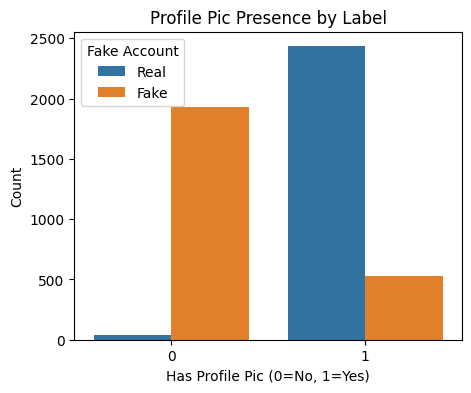

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='profile pic', hue='fake', data=df1)
plt.title('Profile Pic Presence by Label')
plt.xlabel('Has Profile Pic (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Fake Account', labels=['Real','Fake'])
plt.show()

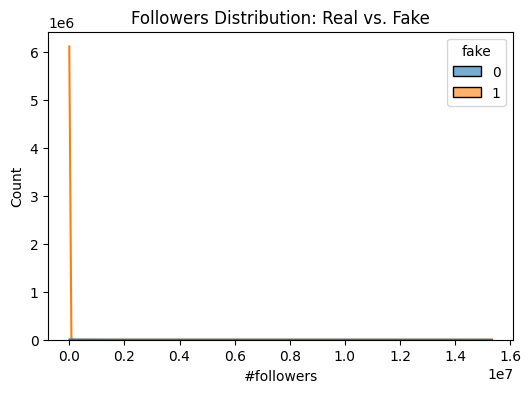

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(
    data=df1,
    x='#followers',
    hue='fake',
    kde=True,
    bins=30,
    alpha=0.6
)
plt.title('Followers Distribution: Real vs. Fake')
plt.xlabel('#followers')
plt.ylabel('Count')
plt.show()

Most Fake/bots account has very few followers

### Description length box-plot

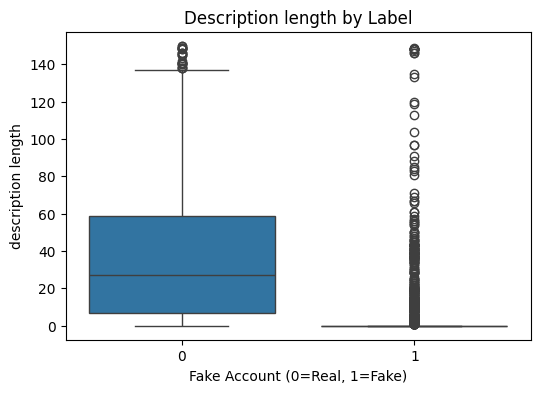

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='fake',
    y='description length',
    data=df1
)
plt.title('Description length by Label')
plt.xlabel('Fake Account (0=Real, 1=Fake)')
plt.ylabel('description length')
plt.show()

### Nums/length username boxplot

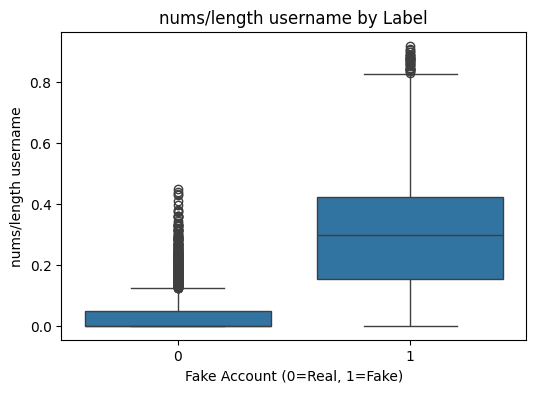

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x='fake',
    y='nums/length username',
    data=df1,
)
plt.title('nums/length username by Label')
plt.xlabel('Fake Account (0=Real, 1=Fake)')
plt.ylabel('nums/length username')
plt.show()

Half of real user has no numbers in their username
while bots typically have a high digit‐to‐character ratio

### Correlation heatmap

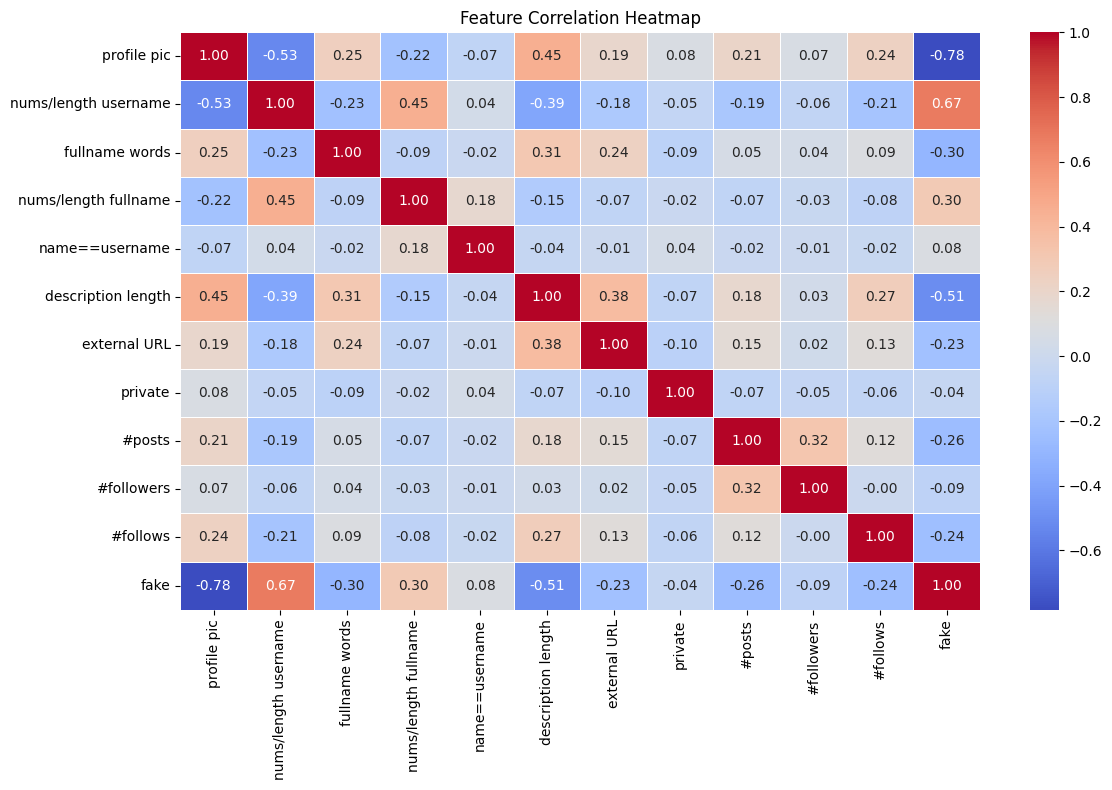

In [ ]:
correlation = df1.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(
    correlation,         # Your correlation matrix
    annot=True,          # Show the numbers on the heatmap
    cmap='coolwarm',     # Color gradient: blue to red
    fmt=".2f",           # Format numbers to 2 decimal places
    linewidths=0.5       # Thin lines between squares
)

plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.grid(False)
plt.show()

## Log transformation

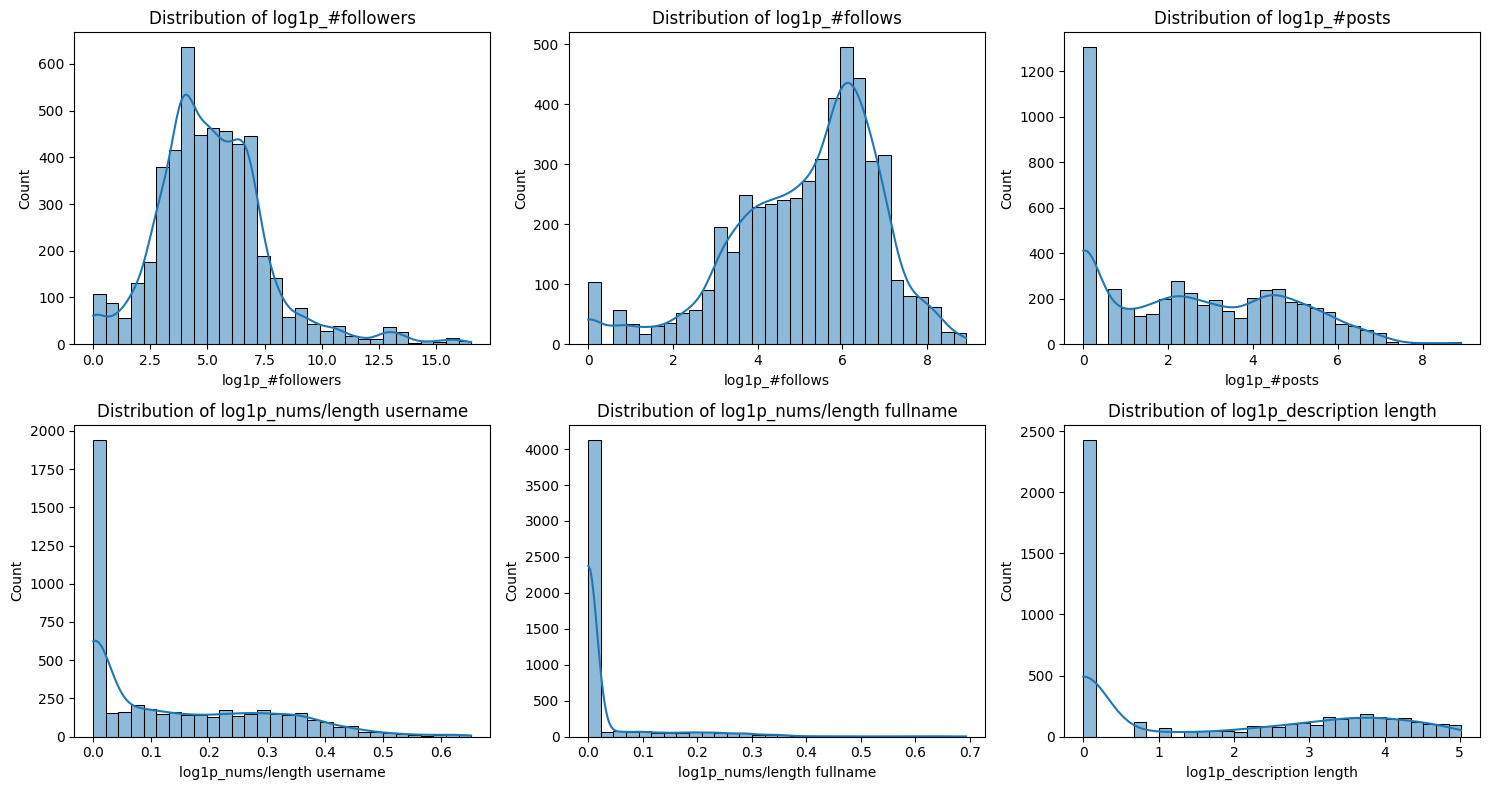

In [ ]:
raw_feats = [
    '#followers',
    '#follows',
    '#posts',
    'nums/length username',
    'nums/length fullname',
    'description length'
]

# Create log1p versions
for feat in raw_feats:
    df1[f'log1p_{feat}'] = np.log1p(df1[feat])

# Plot all the log-transformed features in a grid
log_feats = [f'log1p_{feat}' for feat in raw_feats]
n = len(log_feats)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 4 * nrows))
axes = axes.flatten()

for ax, feat in zip(axes, log_feats):
    sns.histplot(df1[feat], kde=True, bins=30, ax=ax)
    ax.set_title(f'Distribution of {feat}')
    ax.set_xlabel(feat)
    ax.set_ylabel('Count')

# Hide any empty subplots
for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

Spread out feature's distribtution

## Follow/Followers ratio

In [ ]:
df1['Follow_to_Followers_Ratio'] = df1['#follows'] / df1['#followers']
df1

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,log1p_#followers,log1p_#follows,log1p_#posts,log1p_nums/length username,log1p_nums/length fullname,log1p_description length,Follow_to_Followers_Ratio
0,1,0.270000,0,0.000000,0,53,0,0,32,1000,955,0,6.908755,6.862758,3.496508,0.239017,0.000000,3.988984,0.955000
1,1,0.000000,2,0.000000,0,44,0,0,286,2740,533,0,7.916078,6.280396,5.659482,0.000000,0.000000,3.806662,0.194526
2,1,0.100000,2,0.000000,0,0,0,1,13,159,98,0,5.075174,4.595120,2.639057,0.095310,0.000000,0.000000,0.616352
3,1,0.000000,1,0.000000,0,82,0,0,679,414,651,0,6.028279,6.480045,6.522093,0.000000,0.000000,4.418841,1.572464
4,1,0.000000,2,0.000000,0,0,0,1,6,151,126,0,5.023881,4.844187,1.945910,0.000000,0.000000,0.000000,0.834437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4929,0,0.258135,0,0.000000,0,0,0,1,7,1,217,1,0.693147,5.384495,2.079442,0.229631,0.000000,0.000000,217.000000
4930,0,0.511986,1,0.000000,0,0,0,0,0,51,24,1,3.951244,3.218876,0.000000,0.413424,0.000000,0.000000,0.470588
4931,0,0.473108,1,0.353231,0,0,0,0,0,20,0,1,3.044522,0.000000,0.000000,0.387374,0.302495,0.000000,0.000000
4932,0,0.293326,1,0.000000,0,0,0,0,75,1314,5120,1,7.181592,8.541105,4.330733,0.257217,0.000000,0.000000,3.896499


In [ ]:
df1.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


In [ ]:
#Replace infinty or Nan with 0
df1['Follow_to_Followers_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df1['Follow_to_Followers_Ratio'].fillna(0, inplace=True)

<ipython-input-25-28396c24f967>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Follow_to_Followers_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-25-28396c24f967>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
df1.isnull().sum()

,0
profile pic,0
nums/length username,0
fullname words,0
nums/length fullname,0
name==username,0
description length,0
external URL,0
private,0
#posts,0
#followers,0


## Data split

In [ ]:
from sklearn.model_selection import train_test_split

X = df1.drop('fake', axis=1)
Y = df1['fake']

X_train_valid, X_test, Y_train_valid, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42, stratify=Y)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train_valid, Y_train_valid, test_size=0.1765, random_state=42, stratify=Y_train_valid)

## Logistics regression (Performance on validation set)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, Y_train)

Y_valid_pred_lr = lr_model.predict(X_valid)
print("Logistic Regression Accuracy:", accuracy_score(Y_valid, Y_valid_pred_lr))
print(classification_report(Y_valid, Y_valid_pred_lr))

Logistic Regression Accuracy: 0.9676113360323887
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       372
           1       0.98      0.95      0.97       369

    accuracy                           0.97       741
   macro avg       0.97      0.97      0.97       741
weighted avg       0.97      0.97      0.97       741



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Confusion Matrix

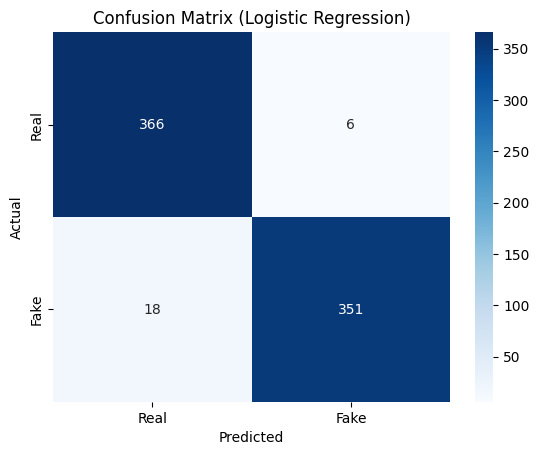

In [ ]:
cm_lr = confusion_matrix(Y_valid, Y_valid_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (Logistic Regression)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Feature Importance

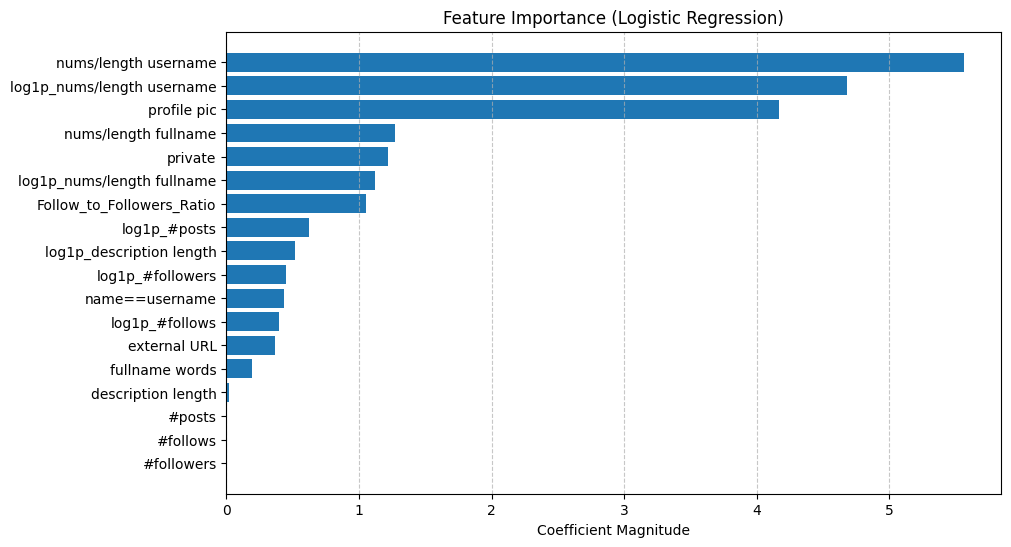

In [ ]:
# Coefficients from logistic regression model
lr_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.abs(lr_model.coef_[0])  # Absolute value of coefficients
})

lr_importance = lr_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(lr_importance['Feature'], lr_importance['Importance'])
plt.xlabel('Coefficient Magnitude')
plt.title('Feature Importance (Logistic Regression)')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

## Lightgbm (Performance on validation set)

In [ ]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, Y_train)

Y_valid_pred_lgb = lgb_model.predict(X_valid)
print("LightGBM Accuracy:", accuracy_score(Y_valid, Y_valid_pred_lgb))
print(classification_report(Y_valid, Y_valid_pred_lgb))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1720, number of negative: 1732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 3452, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498262 -> initscore=-0.006953
[LightGBM] [Info] Start training from score -0.006953
LightGBM Accuracy: 0.99055330634278
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       372
           1       1.00      0.98      0.99       369

    accuracy                           0.99       741
   macro avg       0.99      0.99      0.99       741
weighted avg       0.99      0.99      0.99       741



### Confusion Matrix

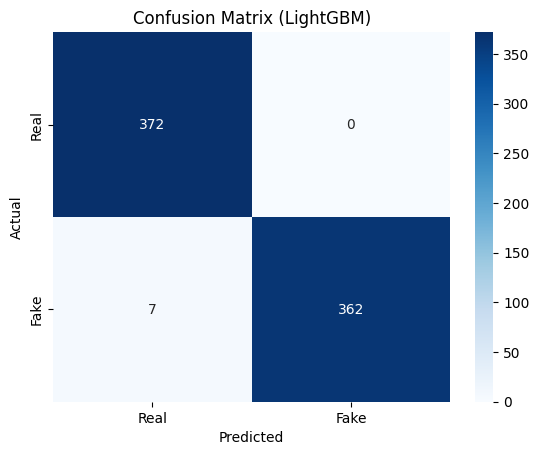

In [ ]:
cm_lgb = confusion_matrix(Y_valid, Y_valid_pred_lgb)
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (LightGBM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Feature Importance

<Figure size 1000x600 with 0 Axes>

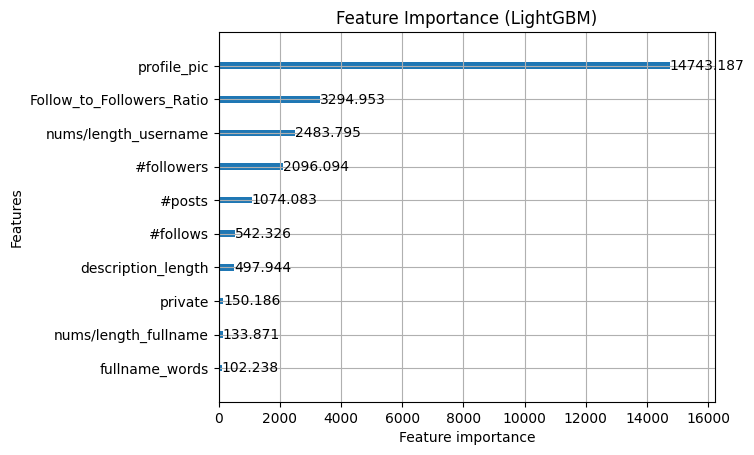

In [ ]:
plt.figure(figsize=(10, 6))
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='gain')
plt.title("Feature Importance (LightGBM)")
plt.show()

## Lightgbm (Performance on test set)

Test Accuracy: 0.99055330634278
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       372
           1       0.99      0.99      0.99       369

    accuracy                           0.99       741
   macro avg       0.99      0.99      0.99       741
weighted avg       0.99      0.99      0.99       741

ROC AUC: 0.999446338549407


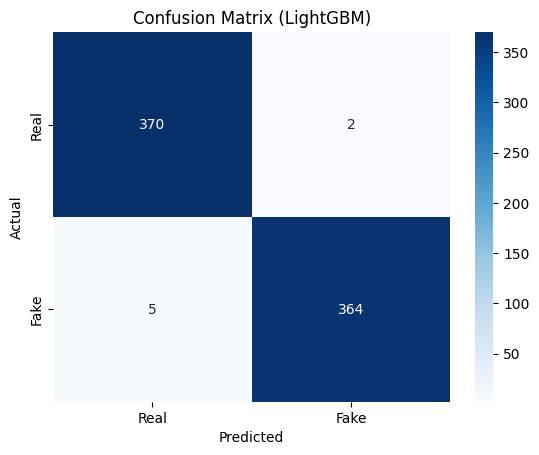

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


Y_test_pred = lgb_model.predict(X_test)
Y_test_proba = lgb_model.predict_proba(X_test)[:, 1]


print("Test Accuracy:", accuracy_score(Y_test, Y_test_pred))
print(classification_report(Y_test, Y_test_pred))
print("ROC AUC:", roc_auc_score(Y_test, Y_test_proba))

cm_lgb_test = confusion_matrix(Y_test, Y_test_pred)
sns.heatmap(cm_lgb_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.title("Confusion Matrix (LightGBM)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Dataset 2

Data collected manually from instagram bot account (100 samples)

Already cleaned

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/Fake bot_instagram_account_detection_(Tabular)/Sample_from_real_ig_account.csv')
df2.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
95,1,0.0,2,0.0,0,4,0,1,0,110,134,0
96,1,0.0,2,0.0,0,2,0,1,1,583,611,0
97,1,0.0,2,0.0,0,0,0,1,0,452,477,0
98,1,0.0,1,0.0,0,2,0,1,3,705,709,0
99,1,0.0,1,0.0,0,18,0,0,2,521,960,0


## Log transformation

In [ ]:
raw_feats2 = [
    '#followers',
    '#follows',
    '#posts',
    'nums/length username',
    'nums/length fullname',
    'description length'
]

# Create log1p versions
for feat2 in raw_feats2:
    df2[f'log1p_{feat2}'] = np.log1p(df2[feat2])

df2

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,log1p_#followers,log1p_#follows,log1p_#posts,log1p_nums/length username,log1p_nums/length fullname,log1p_description length
0,0,0.222222,0,0.0,0,0,0,0,0,0,3005,1,0.000000,8.008366,0.000000,0.200671,0.0,0.000000
1,0,1.250000,0,0.0,0,0,0,0,0,0,260,1,0.000000,5.564520,0.000000,0.810930,0.0,0.000000
2,1,0.222222,0,0.0,0,0,0,0,0,17,5456,1,2.890372,8.604654,0.000000,0.200671,0.0,0.000000
3,1,0.000000,0,0.0,0,0,0,0,0,15,1039,1,2.772589,6.946976,0.000000,0.000000,0.0,0.000000
4,0,0.285714,0,0.0,0,0,0,0,0,16,5116,1,2.833213,8.540324,0.000000,0.251314,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.000000,2,0.0,0,4,0,1,0,110,134,0,4.709530,4.905275,0.000000,0.000000,0.0,1.609438
96,1,0.000000,2,0.0,0,2,0,1,1,583,611,0,6.369901,6.416732,0.693147,0.000000,0.0,1.098612
97,1,0.000000,2,0.0,0,0,0,1,0,452,477,0,6.115892,6.169611,0.000000,0.000000,0.0,0.000000
98,1,0.000000,1,0.0,0,2,0,1,3,705,709,0,6.559615,6.565265,1.386294,0.000000,0.0,1.098612


## Follow/Followers ratio

In [ ]:
df2['Follow_to_Followers_Ratio'] = df2['#follows'] / df2['#followers']
df2

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,log1p_#followers,log1p_#follows,log1p_#posts,log1p_nums/length username,log1p_nums/length fullname,log1p_description length,Follow_to_Followers_Ratio
0,0,0.222222,0,0.0,0,0,0,0,0,0,3005,1,0.000000,8.008366,0.000000,0.200671,0.0,0.000000,inf
1,0,1.250000,0,0.0,0,0,0,0,0,0,260,1,0.000000,5.564520,0.000000,0.810930,0.0,0.000000,inf
2,1,0.222222,0,0.0,0,0,0,0,0,17,5456,1,2.890372,8.604654,0.000000,0.200671,0.0,0.000000,320.941176
3,1,0.000000,0,0.0,0,0,0,0,0,15,1039,1,2.772589,6.946976,0.000000,0.000000,0.0,0.000000,69.266667
4,0,0.285714,0,0.0,0,0,0,0,0,16,5116,1,2.833213,8.540324,0.000000,0.251314,0.0,0.000000,319.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.000000,2,0.0,0,4,0,1,0,110,134,0,4.709530,4.905275,0.000000,0.000000,0.0,1.609438,1.218182
96,1,0.000000,2,0.0,0,2,0,1,1,583,611,0,6.369901,6.416732,0.693147,0.000000,0.0,1.098612,1.048027
97,1,0.000000,2,0.0,0,0,0,1,0,452,477,0,6.115892,6.169611,0.000000,0.000000,0.0,0.000000,1.055310
98,1,0.000000,1,0.0,0,2,0,1,3,705,709,0,6.559615,6.565265,1.386294,0.000000,0.0,1.098612,1.005674


In [ ]:
#Replace infinty or Nan with 0
df2['Follow_to_Followers_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
df2['Follow_to_Followers_Ratio'].fillna(0, inplace=True)
df2

<ipython-input-38-8ba2a65154fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Follow_to_Followers_Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
<ipython-input-38-8ba2a65154fe>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake,log1p_#followers,log1p_#follows,log1p_#posts,log1p_nums/length username,log1p_nums/length fullname,log1p_description length,Follow_to_Followers_Ratio
0,0,0.222222,0,0.0,0,0,0,0,0,0,3005,1,0.000000,8.008366,0.000000,0.200671,0.0,0.000000,0.000000
1,0,1.250000,0,0.0,0,0,0,0,0,0,260,1,0.000000,5.564520,0.000000,0.810930,0.0,0.000000,0.000000
2,1,0.222222,0,0.0,0,0,0,0,0,17,5456,1,2.890372,8.604654,0.000000,0.200671,0.0,0.000000,320.941176
3,1,0.000000,0,0.0,0,0,0,0,0,15,1039,1,2.772589,6.946976,0.000000,0.000000,0.0,0.000000,69.266667
4,0,0.285714,0,0.0,0,0,0,0,0,16,5116,1,2.833213,8.540324,0.000000,0.251314,0.0,0.000000,319.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.000000,2,0.0,0,4,0,1,0,110,134,0,4.709530,4.905275,0.000000,0.000000,0.0,1.609438,1.218182
96,1,0.000000,2,0.0,0,2,0,1,1,583,611,0,6.369901,6.416732,0.693147,0.000000,0.0,1.098612,1.048027
97,1,0.000000,2,0.0,0,0,0,1,0,452,477,0,6.115892,6.169611,0.000000,0.000000,0.0,0.000000,1.055310
98,1,0.000000,1,0.0,0,2,0,1,3,705,709,0,6.559615,6.565265,1.386294,0.000000,0.0,1.098612,1.005674


# Extra-train, Extra-test

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, recall_score, precision_score, roc_auc_score
from lightgbm import LGBMClassifier

# SPLIT fakes vs reals
df_fakes = df2[df2.fake == 1].reset_index(drop=True)  # 50 fake rows
df_reals = df2[df2.fake == 0].reset_index(drop=True)  # 50 real rows

# 25 fake train, 25 fake test
Xf_train, Xf_test, yf_train, yf_test = train_test_split(
    df_fakes.drop('fake', axis=1), df_fakes['fake'],
    test_size=0.5, random_state=42
)

#25 real train, 25 real test
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    df_reals.drop('fake', axis=1), df_reals['fake'],
    test_size=0.5, random_state=42
)

# COMBINE train halves, combine test halves
X_extra_train = pd.concat([Xf_train, Xr_train], axis=0)
y_extra_train = pd.concat([yf_train, yr_train], axis=0)

X_extra_test  = pd.concat([Xf_test,  Xr_test ], axis=0)
y_extra_test  = pd.concat([yf_test,  yr_test ], axis=0)

# EVALUATE existing model on this combined extra-test
y_pred_orig = lgb_model.predict(X_extra_test)
y_proba_orig = lgb_model.predict_proba(X_extra_test)[:,1]

print("=== ORIGINAL MODEL ON EXTRA-TEST ===")
print("Accuracy:", accuracy_score(y_extra_test, y_pred_orig))
print("Recall (fakes):", recall_score(y_extra_test, y_pred_orig))
print("Precision (reals):", precision_score(y_extra_test, y_pred_orig))
print("ROC-AUC:", roc_auc_score(y_extra_test, y_proba_orig))
print("\nFull report:\n", classification_report(y_extra_test, y_pred_orig))

# AUGMENT df1, train with the extra-train set
X_aug = pd.concat([X_train, X_extra_train], axis=0)
y_aug = pd.concat([Y_train, y_extra_train], axis=0)

# RETRAIN LightGBM on the augmented data
model_aug = LGBMClassifier(random_state=42)
model_aug.fit(X_aug, y_aug)

# RE-EVALUATE on the same extra-test
y_pred_aug = model_aug.predict(X_extra_test)
y_proba_aug = model_aug.predict_proba(X_extra_test)[:,1]

print("\n=== AUGMENTED MODEL ON EXTRA-TEST ===")
print("Accuracy:", accuracy_score(y_extra_test, y_pred_aug))
print("Recall (fakes):", recall_score(y_extra_test, y_pred_aug))
print("Precision (reals):", precision_score(y_extra_test, y_pred_aug))
print("ROC-AUC:", roc_auc_score(y_extra_test, y_proba_aug))
print("\nFull report:\n", classification_report(y_extra_test, y_pred_aug))

=== ORIGINAL MODEL ON EXTRA-TEST ===
Accuracy: 0.94
Recall (fakes): 1.0
Precision (reals): 0.8928571428571429
ROC-AUC: 0.9952

Full report:
               precision    recall  f1-score   support

           0       1.00      0.88      0.94        25
           1       0.89      1.00      0.94        25

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.95      0.94      0.94        50

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1745, number of negative: 1757
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2980
[LightGBM] [Info] Number of data points in the train set: 3502, number of used features: 18
[LightGBM] [Info] [binary:Boost

# Deployment

In [ ]:
print(X_aug.columns.tolist())

['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 'description length', 'external URL', 'private', '#posts', '#followers', '#follows', 'log1p_#followers', 'log1p_#follows', 'log1p_#posts', 'log1p_nums/length username', 'log1p_nums/length fullname', 'log1p_description length', 'Follow_to_Followers_Ratio']


In [ ]:
import joblib

# Create directory in Google Drive
import os
save_path = '/content/drive/MyDrive/fake_ig_project'
os.makedirs(save_path, exist_ok=True)

# Save the model
model_path = os.path.join(save_path, 'fake_ig_model.pkl')
joblib.dump(model_aug, model_path)

print(f"✅ Model saved to: {model_path}")

✅ Model saved to: /content/drive/MyDrive/fake_ig_project/fake_ig_model.pkl
